Solve the ODE for the given conditions 
$$y'' = 2 + y^2$$
For the conditions 
$$y(0) = 0 = y(1) $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def ThomasAlgorithm(a, b, c, d, n):
    c_dash = np.zeros(n-1)
    d_dash = np.zeros(n-1)
    c_dash[0] = c[0]/b[0]
    d_dash[0] = d[0]/b[0]
    for itr in range(1, n-1):
        c_dash[itr] = c[itr] / (b[itr] - a[itr] * c_dash[itr-1])
        d_dash[itr] = (d[itr] - a[itr]*d_dash[itr-1]) / (b[itr] - a[itr] * c_dash[itr-1])
    
    y = np.zeros(n-1)
    y[n-2] = d_dash[n-2]
    
    for itr in reversed(range(n-2)):
        y[itr] = d_dash[itr] - c_dash[itr] * y[itr+1]
    
    return y



In [11]:
x0 = 0
xn = 1
y0 = 0 
yn = 1
def func(x0, xn, h = 0.1):
    lst = np.arange(x0, xn, h)
    lst = np.append(lst, xn)
    return lst

In [29]:
def BVP(x0, xn, y0, yn, step, epsilon = 0.0001):
    '''Keeping the initialization y = 0.5cos(x) '''
    x = func(x0, xn, step)
    y = x - x**2
    print(y)
#     y = np.zeros(x.shape[0])
# #     y[0] = 0.5
#     y[-1] = -0.5
#     a = [1/step**2 - 2*(y[i+1] - y[i-1])/(4*step**2)for i in range(1, len(y)-1)]
#     b = [-2/step**2 + -2*y[i] + 1 for i in range(1, len(y)-1)]
#     c = [1/step**2 + 2*(y[i+1] - y[i-1]) for i in range(1, len(y) -1)]
#     d = [-(y[i]**2 - y[i] - 1 + (y[i+1] -y[i-1])**2/(4*step**2) - (y[i-1] - 2*y[i] + y[i+1])/(step**2)) for i in range(1, len(y)-1)]
    delta_y = np.ones(y.shape)
    while(np.amax(np.absolute(delta_y))>epsilon):
        a = [1/step**2 for i in range(1, len(y)-1)]
        b = [-2*y[i] - 2/step**2 for i in range(1, len(y)-1)]
        c = [1/step**2 for i in range(1, len(y) -1)]
        d = [2 +y[i]**2  -(y[i-1] - 2*y[i] + y[i+1])/(step**2) for i in range(1, len(y)-1)]
        delta_y = ThomasAlgorithm(a, b, c, d, len(y)-1)
        delta_y = np.insert(delta_y, 0, 0)
        delta_y = np.append(delta_y, 0)
        print(delta_y)
        y = y + delta_y
        
    return y


In [30]:
y_new = BVP(x0, xn, y0, yn, step=0.02, epsilon = 0.0001)
print(y_new)

[0.     0.0196 0.0384 0.0564 0.0736 0.09   0.1056 0.1204 0.1344 0.1476
 0.16   0.1716 0.1824 0.1924 0.2016 0.21   0.2176 0.2244 0.2304 0.2356
 0.24   0.2436 0.2464 0.2484 0.2496 0.25   0.2496 0.2484 0.2464 0.2436
 0.24   0.2356 0.2304 0.2244 0.2176 0.21   0.2016 0.1924 0.1824 0.1716
 0.16   0.1476 0.1344 0.1204 0.1056 0.09   0.0736 0.0564 0.0384 0.0196
 0.    ]
[ 0.         -0.03824182 -0.07488408 -0.10992806 -0.14337572 -0.17522966
 -0.20549297 -0.23416918 -0.26126215 -0.28677599 -0.31071497 -0.33308349
 -0.35388595 -0.37312674 -0.39081016 -0.40694035 -0.42152127 -0.43455662
 -0.44604985 -0.45600406 -0.46442201 -0.47130609 -0.47665828 -0.48048015
 -0.48277281 -0.48353696 -0.48277281 -0.48048015 -0.47665828 -0.47130609
 -0.46442201 -0.45600406 -0.44604985 -0.43455662 -0.42152127 -0.40694035
 -0.39081016 -0.37312674 -0.35388595 -0.33308349 -0.31071497 -0.28677599
 -0.26126215 -0.23416918 -0.20549297 -0.17522966 -0.14337572 -0.10992806
 -0.07488408 -0.03824182  0.        ]
[ 0.         -

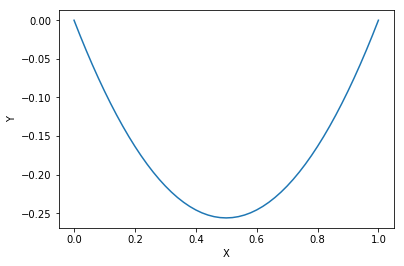

In [31]:
x = func(x0, xn, 0.02)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y_new, '-')